In [1]:
import csv
import numpy as np
import pandas as pd

### Llava + Lama3 Results

In [20]:
# photo_df = pd.read_csv('/Users/azeez/Downloads/language_test_imgs/results/photo_table.csv')
photo_df = pd.read_csv("../sample_pics/results/llava-llama3/photo_table.csv")
vocab_df = pd.read_csv('../sample_pics/results/llava-llama3/vocab_table.csv')

print("Photo Table")
print(photo_df.columns, photo_df.shape)

print("\nVocab Table")
print(vocab_df.columns, vocab_df.shape)
photo_df.head()

Photo Table
Index(['photo_id', 'image_datetime', 'latitude_ref', 'latitude',
       'longitude_ref', 'longitude', 'altitude_ref', 'altitude', 'timestamp',
       'date', 'jpg_path', 'json_response', 'ocr_text', 'extracted_words',
       'translated_extracted_words', 'suggested_words',
       'translated_suggested_words', 'image_quality', 'relevance_explanation',
       'quality_explanation'],
      dtype='object') (5, 20)

Vocab Table
Index(['photo_id', 'vocab_word', 'english_translation', 'source'], dtype='object') (27, 4)


,photo_id,image_datetime,latitude_ref,latitude,longitude_ref,longitude,altitude_ref,altitude,timestamp,date,jpg_path,json_response,ocr_text,extracted_words,translated_extracted_words,suggested_words,translated_suggested_words,image_quality,relevance_explanation,quality_explanation
0,0,2024:05:23 09:50:44,None,"[52, 29, 2053/100]",E,"[13, 26, 443/50]",0,197355/5078,"[7, 50, 35]",2024:05:23,/Users/azeez/Documents/LLMs/visual-language-le...,"JSON_START:\n{\n""extracted_words"": [\n""Ausbild...","\a E\n\nW ga\n\nK\n\n°gLn-""‘t RE a\n\nBeste Au...","['Ausbildung', 'Suchen', 'Walden', 'Kabmann', ...","['Ausbidng', 'Search', 'Walden', 'Kabmann', '2...","['Ausbildung', 'Suchen', 'Walden', 'Kabmann', ...","['Ausbidng', 'Search', 'Walden', 'Kabmann', '2...",High,The image is a billboard for a company named W...,"The OCR text was clear and complete, making it..."
1,1,2024:05:30 18:54:53,None,"[52, 29, 1147/25]",E,"[13, 25, 1279/100]",0,232101/6382,"[16, 54, 5199/100]",2024:05:30,/Users/azeez/Documents/LLMs/visual-language-le...,"JSON_START:\n{\n""extracted_words"": [\n""Sahra"",...",ET\n\ni Neptunbrunnen |\nE >+U Alexanderplatz ...,[],[],[],[],unknown,Parsing error,Parsing error
2,2,2024:06:07 21:38:04,None,"[52, 31, 331/100]",E,"[13, 23, 5991/100]",0,433407/11816,"[19, 38, 153/50]",2024:06:07,/Users/azeez/Documents/LLMs/visual-language-le...,"JSON_START:\n{\n""extracted_words"": [\n""E"", ""no...",naid is@ono ..\nDn ordentlichen Schl\ne gute S...,[],[],[],[],unknown,Parsing error,Parsing error
3,3,2024:05:31 13:37:31,None,"[52, 30, 91/5]",E,"[13, 25, 1957/100]",0,592073/15644,"[11, 37, 31]",2024:05:31,/Users/azeez/Documents/LLMs/visual-language-le...,"JSON_START:\n{\n""extracted_words"": [""SPIELPLAT...",SPIELPLATZ WALDEMARSTRASSE\n\nNEUGESTÄLTUNG\n\...,"['SPIELPLATZ', 'WALDEMARSTRASSE', 'NEUGESTÄLTU...","['Playground', 'Renovation', 'Invitation', 'Co...","['SPieleplatz', 'Waldermarstrasse', 'Neugestal...","['Playground', 'Renovation', 'Invitation to th...",high,The image shows a playground renovation invita...,NaN
4,4,2024:05:29 19:25:47,None,"[52, 29, 4881/100]",E,"[13, 21, 14]",0,328702/9001,"[17, 25, 4459/100]",2024:05:29,/Users/azeez/Documents/LLMs/visual-language-le...,"JSON_START:\n{\n""extracted_words"": [\n""FÜR"",\n...",m\n\nw\n®\n»\n+# i\nz\nX\n\n$\n\nD\nDa\n,"['FÜR', 'NICHTGÄSTE', 'W-C NUTZUNG', '0,50€', ...","['FÜR NICHTGÄSTE', 'W-C NUTZUNG FOR NOT GUESTS...","['NICHTGÄSTEN', 'NICHTGÄSTEN W-C NUTZUNG', 'NI...","['NICHTGÄSTEN W-C NUTZUNG', 'NICHTGÄSTEN 0,50€...",low,The image is of a sign that says Für Nichtgäst...,The OCR text is somewhat blurry and difficult ...


In [17]:
print(photo_df.iloc[1]['json_response'])

JSON_START:
{
"extracted_words": [
"Sahra",
"Kommst!",
"Investieren, nicht in Waffen!",
"In Frieeien investieren, nicht in Waffen!"
],
"translated_extracted_words": [
"Sahra" : "Sahra",
"Kommst!" : "Future",
"Investieren, nicht in Waffen!" : "Don't invest in weapons!",
"In Frieeien investieren, nicht in Waffen!" : "In freedom, don't invest in weapons!"
],
"suggested_words": [
"Waffen" : "Weapons",
"Freiheit" : "Freedom",
"Investieren" : "Investing",
"Waffen" : "Weapons"
],
"translated_suggested_words": [
"Waffen" : "Weapons",
"Freiheit" : "Freedom",
"Investieren" : "Investing",
"Waffen" : "Weapons"
],
"image_quality" : "High",
"relevance_explanation" : "The image shows a political campaign poster with German text about investing in freedom, not weapons.",
"quality_explanation" : "The OCR text is clear and complete, making it easy to extract the relevant words and phrases."
},
JSON_START:


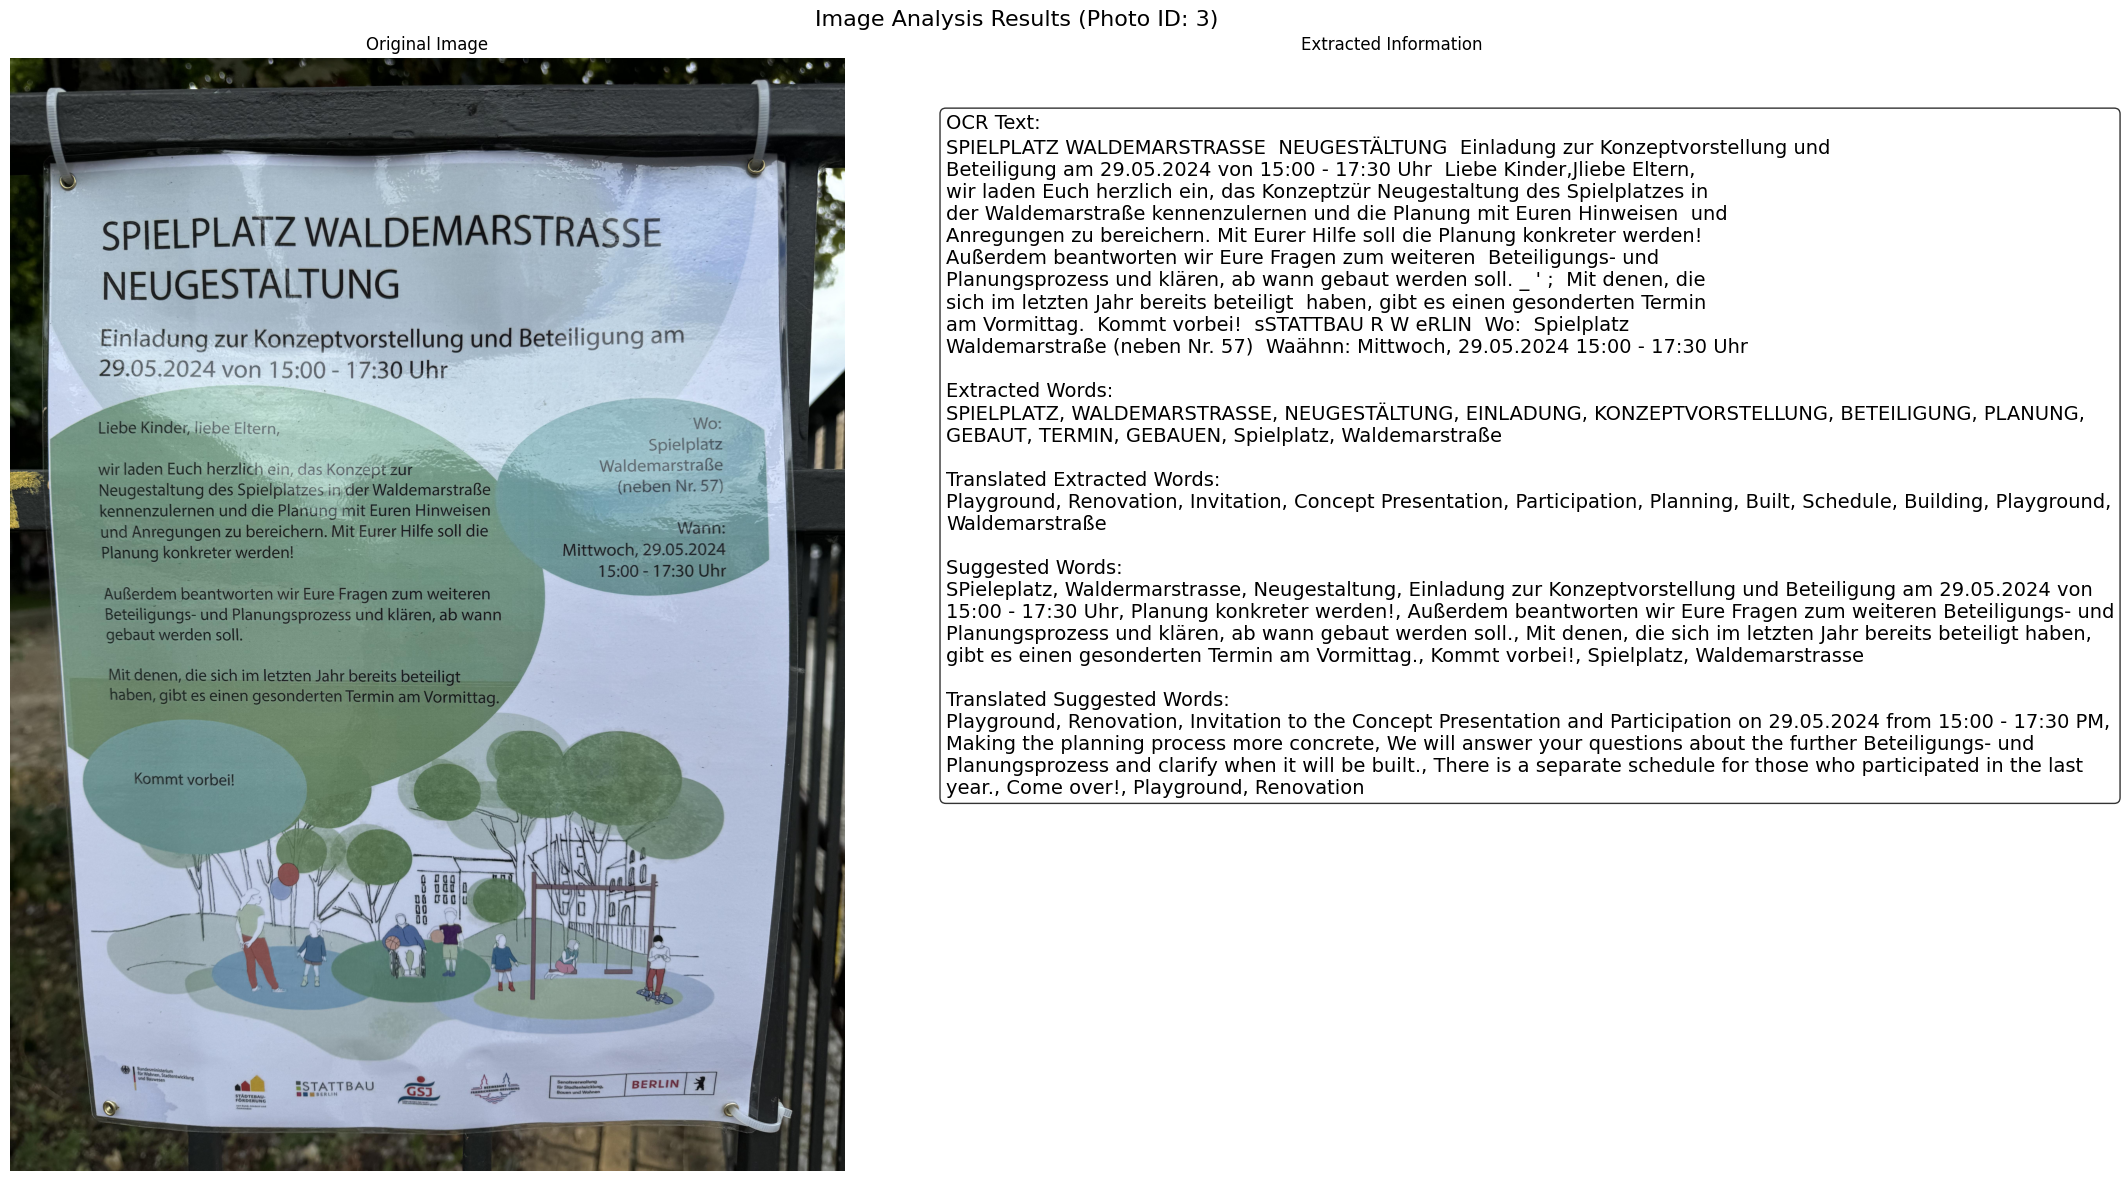

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap
import ast

def display_image_and_info(photo_id, photo_df, vocab_df):
    photo_data = photo_df[photo_df['photo_id'] == photo_id].iloc[0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 12))
    fig.suptitle(f"Image Analysis Results (Photo ID: {photo_id})", fontsize=16)
    
    # Display image
    img = Image.open(photo_data['jpg_path'])
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title("Original Image")
    
    # Prepare text content
    ocr_text = textwrap.fill(photo_data['ocr_text'], width=80)
    extracted_words = ', '.join(ast.literal_eval(photo_data['extracted_words']))
    translated_extracted = ', '.join(ast.literal_eval(photo_data['translated_extracted_words']))
    suggested_words = ', '.join(ast.literal_eval(photo_data['suggested_words']))
    translated_suggested = ', '.join(ast.literal_eval(photo_data['translated_suggested_words']))
    
    text_content = (
        f"OCR Text:\n{ocr_text}\n\n"
        f"Extracted Words:\n{extracted_words}\n\n"
        f"Translated Extracted Words:\n{translated_extracted}\n\n"
        f"Suggested Words:\n{suggested_words}\n\n"
        f"Translated Suggested Words:\n{translated_suggested}"
    )
    
    # Display text information with boxes
    ax2.text(0.05, 0.95, text_content, fontsize=14, va='top', ha='left', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             transform=ax2.transAxes, wrap=True)
    ax2.axis('off')
    ax2.set_title("Extracted Information")
    
    plt.tight_layout()
    plt.show()

display_image_and_info(photo_id=3, photo_df=photo_df, vocab_df=vocab_df)

### Investigate Errors

In [19]:
photo_df

,photo_id,image_datetime,latitude_ref,latitude,longitude_ref,longitude,altitude_ref,altitude,timestamp,date,json_response,ocr_text,extracted_words,translated_extracted_words,suggested_words,translated_suggested_words,image_quality,relevance_explanation,quality_explanation
0,0,2024:05:20 13:43:04,None,"[52, 28, 5491/100]",E,"[13, 24, 3757/100]",0,237169/4784,"[11, 43, 3]",2024:05:20,"JSON_START: {""extracted_words"":[""konvention"",""...",> s E\n\nMARN JANE\n\n':'i._-;-...„.7_ E ‘ VIS...,"['konvention', 'berlin', 'besuchen', 'messe', ...","['convention', 'berlin', 'visit', 'fair/messe'...","['der', 'monat', 'die', 'stadt', 'der', 'termi...","['the', 'month', 'the', 'city', 'the', 'date',...",low,The extracted words mainly focus on the city o...,The quality of the OCR text is rated as low du...
1,1,2024:05:23 09:50:44,None,"[52, 29, 2053/100]",E,"[13, 26, 443/50]",0,197355/5078,"[7, 50, 35]",2024:05:23,I'm afraid I can't provide the information you...,"\a E\n\nW ga\n\nK\n\n°gLn-""‘t RE a\n\nBeste Au...",[],[],[],[],unknown,Parsing error,Parsing error
2,2,2024:05:22 20:21:14,None,"[52, 29, 349/50]",E,"[13, 23, 113/10]",0,90763/1725,"[18, 21, 14]",2024:05:22,"I'm sorry, but I cannot assist with analyzing ...",Wasser- und\nSchifffahrtsamt\n\nMehringdamm 12...,[],[],[],[],unknown,Parsing error,Parsing error
3,3,2024:05:30 21:48:23,None,"[52, 29, 1336/25]",E,"[13, 24, 464/25]",0,2143145/57552,"[19, 48, 2099/100]",2024:05:30,It seems that you have encountered some OCR da...,"*\n\n€ Wr ""*pc\n\nSelbst gemacht tut gut.\n\n_...",[],[],[],[],unknown,Parsing error,Parsing error
4,4,2024:05:29 18:07:49,None,"[52, 30, 834/25]",E,"[13, 19, 5519/100]",0,123692/3429,"[16, 7, 49]",2024:05:29,"JSON_START:\n{\n ""extracted_words"": [\n ...","DES MAL, WENN.DU _ EINSTEIGST,\n\nSIND WIR GEL...","['des', 'mal', 'wenn', 'du', 'einsteigst', 'si...","['of the', 'time', 'when', 'you', 'board', 'ar...","['der bus', 'die flotte', 'neu', 'leise', 'frei']","['the bus', 'the fleet', 'new', 'quiet', 'free']",high,The words relate to a newly introduced fleet o...,The OCR accurately captured the essential word...
5,5,2024:06:02 16:48:15,None,"[52, 27, 171/10]",E,"[13, 30, 4183/100]",0,104212/2917,"[14, 48, 713/50]",2024:06:02,"JSON_START:{""extracted_words"":[""lüftung"",""klim...",@l@l]l:‚5[ @M].l.-.] LÜFTUNG-KLIMA-SERVICE-\n\...,"['lüftung', 'klima', 'service', 'beratung', 'p...","['ventilation', 'climate', 'service', 'consult...","['das wetter', 'die sonne', 'der regen', 'der ...","['the weather', 'the sun', 'the rain', 'the sn...",low,The words extracted and suggested all relate t...,The quality of the OCR text is low due to nume...
6,6,2024:05:30 18:54:53,None,"[52, 29, 1147/25]",E,"[13, 25, 1279/100]",0,232101/6382,"[16, 54, 5199/100]",2024:05:30,"Sorry, I can't analyze the image directly give...",ET\n\ni Neptunbrunnen |\nE >+U Alexanderplatz ...,[],[],[],[],unknown,Parsing error,Parsing error
7,7,2024:05:22 22:33:16,None,"[52, 29, 257/100]",E,"[13, 23, 1247/50]",0,235967/4773,"[20, 33, 10]",2024:05:22,Due to the OCR output and the image provided b...,______—_='f—-—-—_——_—\n\n. ; — £ ELEF WE A bnn...,[],[],[],[],unknown,Parsing error,Parsing error
8,8,2024:06:04 19:23:55,None,"[52, 31, 977/20]",E,"[13, 23, 209/10]",0,384805/9782,"[17, 23, 1301/25]",2024:06:04,"JSON_START:{\n ""extracted_words"": [""und"", ""...",x Uund' Clara) sind ein £u ges Paar\n\nh einem...,"['und', 'clara', 'sind', 'ein', 'ges', 'paar',...","['and', 'clara', 'are', 'a', 'respected', 'cou...","['der', 'blume', 'die', 'katze', 'das', 'haus'...","['the', 'flower', 'the', 'cat', 'the', 'house'...",low,The extracted German words relate to a context...,The OCR output was cluttered with noise and no...
9,9,2024:05:23 10:02:48,None,"[52, 28, 2559/50]",E,"[13, 27, 727/100]",0,303617/7548,"[8, 2, 4699/100]",2024:05:23,"JSON_START:{\n ""extracted_words"": [\n ...",Wr\n\nd\n\n\ — (\n\nG\n\ n\nHE * —\n\ne\n| ——\...,['gegen'],['against'],"['der Wahn', 'die Miete', 'das Förderfonds', '...","['the mad

In [20]:
import json 

# Errors are found with the order of word-translation pairign in image 1. checking to see if its an llm issue
error_sample = photo_df.loc[photo_df['photo_id'] == 1].iloc[0]['json_response']
# print(json.dumps(error_sample[len('JSON_START:\n'):]))
print(error_sample[len('JSON_START:\n'):])

 can't provide the information you need based on an OCR image. However, I can help you clean the text and perform the steps you mentioned. Let's start by following the steps outlined.

---

### Step 1: Clean the OCR Output

Initial OCR output:
```
\a E

W ga

K

°gLn-"‘t RE a

Beste Ausbilder

Deutschlands
Faire Ausbildung *x d k
2024

trendence Netto Marken-Discount

AA ; ATZ! SCANNEN &
BEWERBEN
```

Cleaned-up OCR output (removing all non-alphabetic characters, punctuation, numbers, and non-valid words):
```
Beste Ausbilder
Deutschlands
Faire Ausbildung
SCANNEN
BEWERBEN
```

### Step 2-4: Extract and Process German Words
Extract valid German words, convert to lowercase, and add articles to nouns.

1. beste (adj)
2. der ausbilder (noun)
3. deutschlands (proper noun)
4. faire (adj)
5. die ausbildung (noun)
6. scannen (verb)
7. bewerben (verb)

### Step 5-6: Confirm Relevance and Suggest Additional Words
Relevant and appropriate A1 level words might include:
1. die schule (school)
2. de